# Library

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Images

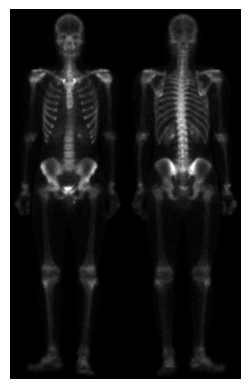

In [8]:
img1 = cv2.imread('skeleton_orig.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

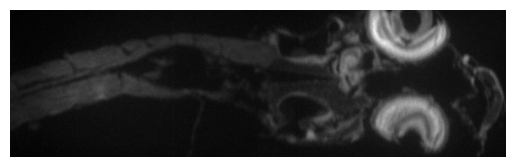

In [9]:
img2 = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

# Useful Functions

In [10]:
def show_results(img, laplacian_img, sharpened_img1, sobel_gradient_img, 
                 smooth_sobel_img, mask_img, sharpened_img2, power_law_trans_img):
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('(A) Original')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(laplacian_img, cmap='gray')
    plt.title('(B) Laplacian')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(sharpened_img1, cmap='gray')
    plt.title('(C) Sharpened (A)+(B)')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(sobel_gradient_img, cmap='gray')
    plt.title('(D) Sobel')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(smooth_sobel_img, cmap='gray')
    plt.title('(E) Blur')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(mask_img, cmap='gray')
    plt.title('(F) Mask')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(sharpened_img2, cmap='gray')
    plt.title('(G) Sharpened (A)+(F)')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(power_law_trans_img, cmap='gray')
    plt.title('(H) Power Transform')
    plt.axis('off')
    
    plt.show()

def normalize_image(image):
    min_val = np.min(image)
    g_m = image - min_val
    
    g_s = 255 * (g_m / np.max(g_m))
    return g_s

## 1. Bone

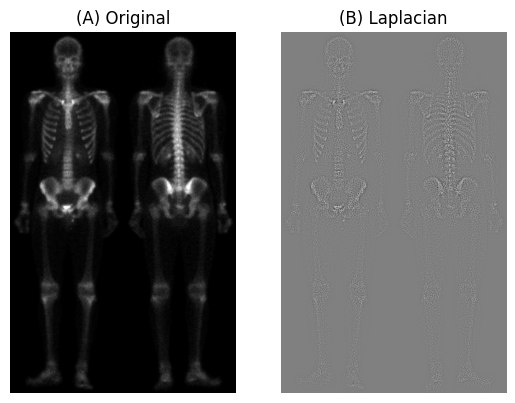

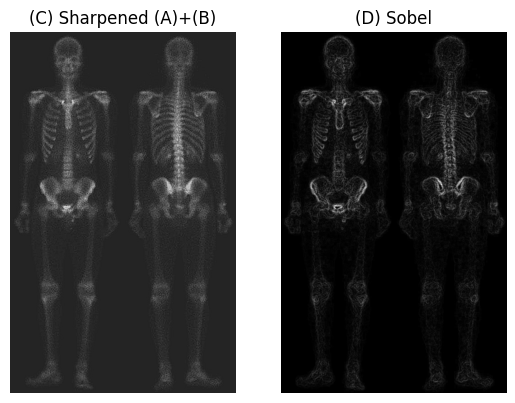

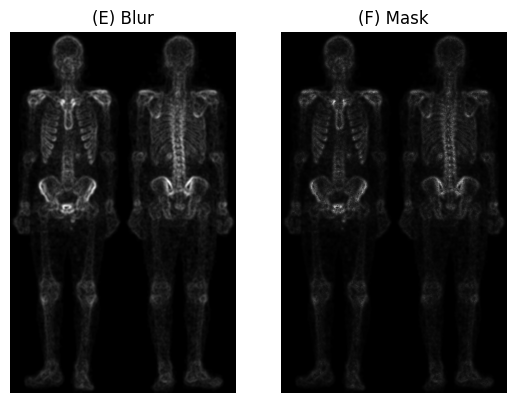

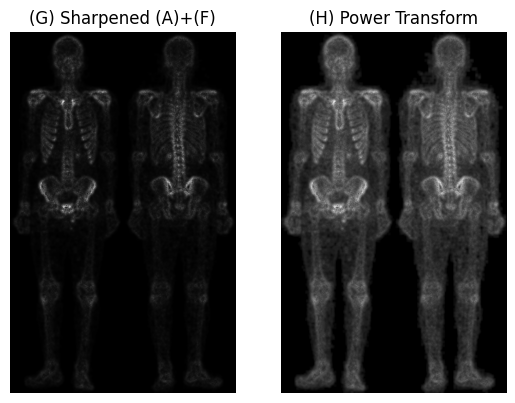

In [11]:
# (b): laplacian
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_img = cv2.filter2D(img1, cv2.CV_64F, laplacian_kernel)

# (c): (a) + (b)
sharpened_by_laplacian_img = img1 + normalize_image(laplacian_img)

# (d): sobel
sobel_kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

grad_x = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_x)
grad_y = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_y)

sobel_mag = np.absolute(grad_x) + np.absolute(grad_y)

# (e): blur
sobel_smoothed_img = cv2.blur(sobel_mag, (5, 5))

# (f): (b) + (e)
mask_img = normalize_image(laplacian_img) * sobel_smoothed_img

# (g): (a) + (f)
sharpened_by_mask_img = img1 + mask_img

# (h): power transform
gamma, c = 0.5, 1
final_img = c * sharpened_by_mask_img ** gamma

# show the results
show_results(img1, laplacian_img, sharpened_by_laplacian_img, sobel_mag, 
             sobel_smoothed_img, mask_img, sharpened_by_mask_img, final_img)

## 2. Fish

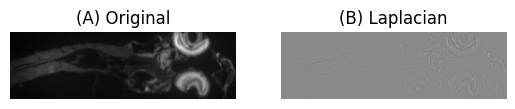

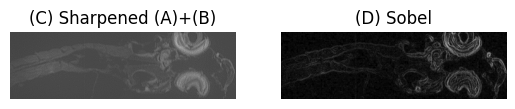

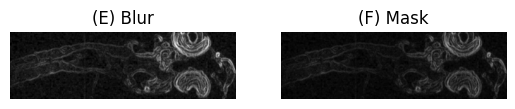

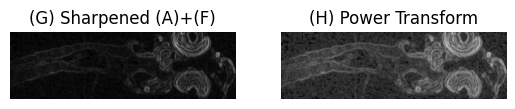

In [12]:
# (b): laplacian
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_img = cv2.filter2D(img2, cv2.CV_64F, laplacian_kernel)

# (c): (a) + (b)
sharpened_by_laplacian_img = img2 + normalize_image(laplacian_img)

# (d): sobel
sobel_kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

grad_x = cv2.filter2D(img2, cv2.CV_64F, sobel_kernel_x)
grad_y = cv2.filter2D(img2, cv2.CV_64F, sobel_kernel_y)

sobel_mag = np.absolute(grad_x) + np.absolute(grad_y)

# (e): blur
sobel_smoothed_img = cv2.blur(sobel_mag, (5, 5))

# (f): (b) + (e)
mask_img = normalize_image(laplacian_img) * sobel_smoothed_img

# (g): (a) + (f)
sharpened_by_mask_img = img2 + mask_img

# (h): power transform
gamma, c = 0.5, 1
final_img = c * sharpened_by_mask_img ** gamma

# show the results
show_results(img2, laplacian_img, sharpened_by_laplacian_img, sobel_mag, 
             sobel_smoothed_img, mask_img, sharpened_by_mask_img, final_img)